In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import time

# 지도 데이터 분석 라이브러리
import fiona
import geopandas

# 데이터 분석 라이브러리
import pandas as pd
import numpy as np

# 데이터 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import style
import seaborn as sns
import folium
from folium.plugins import HeatMap

# 데이터 분리
from sklearn.model_selection import train_test_split

# 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler

# 데이터 샘플링
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# 머신러닝
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 모델 스코어링
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer

In [3]:
# matplotlib 한글 지원 폰트 설정
plt.rc("font", family="Malgun Gothic")

## 데이터 불러오기(세종, 대구, 대전)

In [2]:
sejong = geopandas.read_file('./dataset/전처리후/세종/merge_9.geojson', encoding='utf-8')
sejong = sejong[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

print(len(sejong))
sejong.head(3)

47396


,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((977800.00000 1828600.00000, 977800.0...",36.455719,127.251282,24.869,0,1,83.64,0.00,83.64,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((990100.00000 1837300.00000, 990100.0...",36.533877,127.387655,25.167,0,1,208.91,7.80,198.71,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((980600.00000 1843000.00000, 980600.0...",36.585083,127.282326,24.825,27,4,99.70,6.43,99.25,0,0,0,0,0,0,0,0,0,0


In [3]:
daegu = geopandas.read_file('./dataset/전처리후/대구/merge_9.geojson', encoding='utf-8')
daegu = daegu[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

print(len(daegu))
daegu.head(3)

134846


,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((1098300.00000 1762500.00000, 1098300...",35.861902,128.587298,28.786,124.0,18.0,473.52,9.97,452.73,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((1095800.00000 1760400.00000, 1095800...",35.843036,128.559580,28.763,298.0,47.0,215.99,8.83,213.95,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((1099700.00000 1760500.00000, 1099700...",35.843935,128.602820,28.865,173.0,6.0,263.28,19.39,1323.18,0,0,0,0,0,0,0,0,0,0


In [4]:
daejeon = geopandas.read_file('./dataset/전처리후/대전/merge_9.geojson', encoding='utf-8')
daejeon = daejeon[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

print(len(daejeon))
daejeon.head(3)

92051


,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((992800.00000 1826000.00000, 992800.0...",36.432362,127.417591,25.355,77.0,8.0,107.63,10.78,1488.43,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((993300.00000 1822700.00000, 993300.0...",36.402716,127.423134,25.429,286.0,1.0,0.00,0.00,9653.28,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((992800.00000 1827500.00000, 992800.0...",36.445837,127.417591,25.335,81.0,18.0,147.06,7.18,172.82,0,0,0,0,0,0,0,0,0,0


## Train / Test Data 정의

### data / target 분리

#### Train set

In [5]:
# 학습 데이터는 대구+대전
# 226897개

train_data = pd.concat([daegu[daegu.columns[3:-1]], daejeon[daejeon.columns[3:-1]]])
print(len(train_data))
train_data.head()

226897


,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설
0,28.786,124.0,18.0,473.52,9.97,452.73,0,0,0,0,0,0,0,0,0
1,28.763,298.0,47.0,215.99,8.83,213.95,0,0,0,0,0,0,0,0,0
2,28.865,173.0,6.0,263.28,19.39,1323.18,0,0,0,0,0,0,0,0,0
3,28.777,166.0,34.0,201.79,8.20,213.84,0,0,0,0,0,0,0,0,0
4,28.832,438.0,2.0,0.00,54.80,8614.43,0,0,0,0,0,0,0,0,0


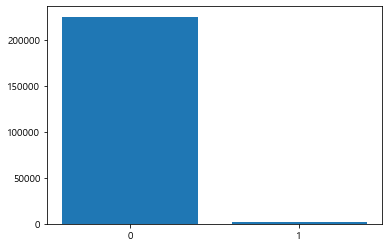

0    224937
1      1960
Name: EV, dtype: int64


In [6]:
# 학습 데이터의 Y는 격자 내 전기차 충전소 유무
# 대구+대전에서 전기차 충전소가 없는 격자는 224937곳, 있는 곳은 1960곳

train_target = pd.concat([daegu[daegu.columns[-1]], daejeon[daejeon.columns[-1]]])

plt.bar(train_target.unique(), train_target.value_counts())
plt.xticks([0, 1])
plt.show()
print(train_target.value_counts())

#### Test set

In [10]:
# 검증 데이터는 세종시
# 47396개

test_data = sejong[sejong.columns[3:-1]]
print(len(test_data))
test_data.head()

47396


,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설
0,24.869,0,1,83.64,0.00,83.64,0,0,0,0,0,0,0,0,0
1,25.167,0,1,208.91,7.80,198.71,0,0,0,0,0,0,0,0,0
2,24.825,27,4,99.70,6.43,99.25,0,0,0,0,0,0,0,0,0
3,25.007,0,3,123.00,5.37,277.76,0,0,0,0,0,0,0,0,0
4,24.447,27,20,77.54,8.25,123.95,0,0,0,0,0,0,0,0,0


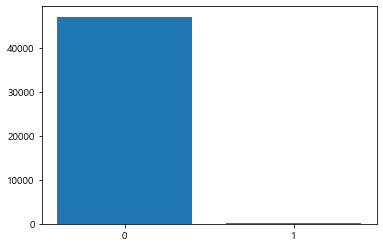

0    47120
1      276
Name: EV, dtype: int64


In [11]:
# 검증 데이터의 Y는 격자 내 전기차 충전소 유무
# 세종시에서 전기차 충전소가 없는 격자는 47120곳, 있는 곳은 276곳

test_target = sejong[sejong.columns[-1]]

plt.bar(test_target.unique(), test_target.value_counts())
plt.xticks([0, 1])
plt.show()
print(test_target.value_counts())

## 모델 정의

In [15]:
### GridSearchCV는 쉽게 최적의 파라미터를 찾아주지만, 안그래도 편향된 데이터를 CV를 활용하다보니 성능이 도리어 안나오는 상황이 연출됨
### 따라서 반복문을 통해 GridSearch와 유사하게 모든 경우의수를 비교할 수 있도록하고, CV는 활용하지 않는 방향으로 진행

### RandomForestClassifier

In [33]:
def RandomForest(dists, train_data, train_target, test_data, test_target):
    
    trainF1 = []
    testF1 = []
    sketch_trainF1 = []
    sketch_testF1 = []
    param = []
    
    for estimators in dists['max_depth']:
        testf1indepth = []
        trainf1indepth = []
        for depth in dists['n_estimators']:
            for features in dists['max_features']:
                clf = ensemble.RandomForestClassifier(n_estimators=estimators, max_depth=depth, max_features=features, n_jobs=4)
                clf.fit(train_data, train_target)
                Y_predTrain = clf.predict(train_data)
                Y_predTest = clf.predict(test_data)
                
                param.append([estimators, depth, features])
                trainF1.append(f1_score(train_target, Y_predTrain, average='micro'))
                testF1.append(f1_score(test_target, Y_predTest, average='micro'))
                testf1indepth.append(f1_score(test_target, Y_predTest, average='micro'))
                trainf1indepth.append(f1_score(train_target, Y_predTrain, average='micro'))
        
        sketch_trainF1.append(max(trainf1indepth))
        sketch_testF1.append(max(testf1indepth))
                    
    best_params = param[testF1.index(max(testF1))]
    print()
    print('best_params (test 성능이 가장 좋은 파라미터) : ', 'n_estimators=', best_params[0], 'max_depth=', best_params[1], 'max_features=', best_params[2])
    print('best_score (test F1 score):', max(testF1))
    print()

    # F1 score 비교
    plt.figure(figsize=(15, 6))
    plt.plot(dists['max_depth'], sketch_trainF1, 'ro-', dists['max_depth'], sketch_testF1, 'bv--')
    plt.legend(['Train F1', 'Test F1'])
    plt.xlabel('estimators')
    plt.ylabel('F1 score')
    plt.show()
    
    # 최적의 파라미터를 입력해 모델을 생성
    clf = ensemble.RandomForestClassifier(n_estimators=best_params[0], max_depth=best_params[1], max_features=best_params[2], n_jobs=4)
    clf.fit(train_data, train_target)
    Y_predTest = clf.predict(test_data)
    
    # 지도 그리기
    temp = sejong.copy()
    temp['pred'] = [0]*len(temp)
    for i, idx in enumerate(test_data.index):
        temp['pred'][idx] = Y_predTest[i]
    #temp['pred'] = pred
        
    print('실제 충전소 수 :', len(temp[temp['EV']==1]))
    print('충전소가 있어야 한다고 분류한 타일 수 :', len(temp[temp['pred']==1]))
    print('recall score 실제 충전소가 맞는 지 맞춘 경우 :', len(temp[(temp['pred']==1) & (temp['EV']==1)]), '/', len(temp[temp['EV']==1]))
    print('precision score 실제 충전소가 없는 곳을 맞춘 경우 :', len(temp[(temp['pred']==0) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    print('최적 입지 후보(실제론 없지만, 있어야 한다고 분류) :', len(temp[(temp['pred']==1) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    
    # feature inportance
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
    clf_importances = pd.Series(importances, index=test_data.columns)

    fig, ax = plt.subplots()
    clf_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    
    idx = temp[(temp['EV'] == 0) & (temp['pred'] == 1)].index
    for i in temp[temp['pred'] == 1].index:
        temp['pred'].loc[i] = 0
    for i in idx:
        temp['pred'].loc[i] = 1

    fig, ax1 = plt.subplots(figsize=(15, 15))
    fig.set_facecolor('white')
    sejong['geometry'].plot(ax=ax1, color='gainsboro')
    sejong[sejong['EV']==1].plot(ax=ax1, column='EV', color='lime', aspect=1)
    temp[temp['pred']==1].plot(ax=ax1, column='pred', color='red', aspect=1)
    ax1.set_axis_off()
    plt.show()
    
    return clf, temp

### 학습 & 시각화


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 5 max_depth= 10 max_features= 7
best_score (test F1 score): 0.9941767237741581



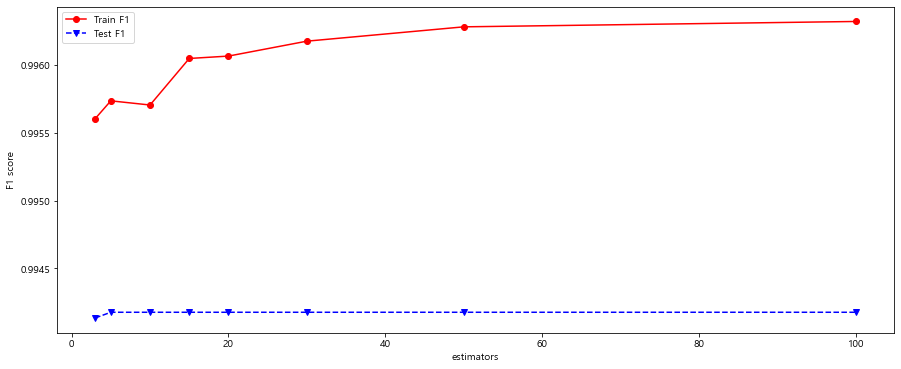

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 1
recall score 실제 충전소가 맞는 지 맞춘 경우 : 0 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47119 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 1 / 47120


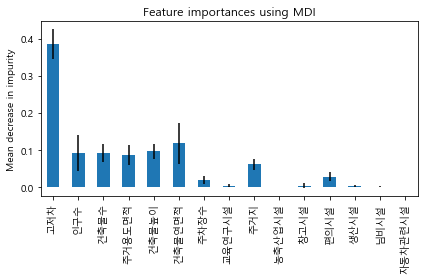

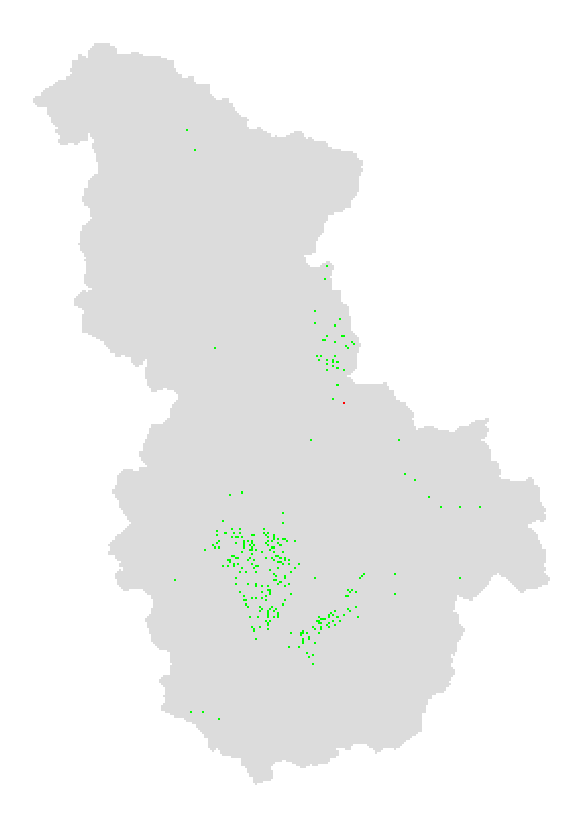

In [34]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,13,15], 
    'n_estimators' : [10,20,30,50,100,200]
}

clf, df = RandomForest(dists, train_data, train_target, test_data, test_target)

#### TP가 0으로 기존 충전소를 제대로 분류하지 못함.

### 정규화

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sejong_minmax = scaler.fit_transform(sejong[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
sejong_minmax = pd.DataFrame(sejong_minmax, columns=['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
sejong[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = sejong_minmax

sejong.head(3)

,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((977800.00000 1828600.00000, 977800.0...",36.455719,127.251282,0.551724,0.00000,0.014706,0.090746,0.000000,0.000854,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((990100.00000 1837300.00000, 990100.0...",36.533877,127.387655,0.894253,0.00000,0.014706,0.226660,0.064580,0.002029,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((980600.00000 1843000.00000, 980600.0...",36.585083,127.282326,0.501149,0.01176,0.058824,0.108171,0.053237,0.001014,0,0,0,0,0,0,0,0,0,0


In [36]:
daegu_minmax = scaler.fit_transform(daegu[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
daegu_minmax = pd.DataFrame(daegu_minmax, columns=['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
daegu[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = daegu_minmax

daejeon_minmax = scaler.fit_transform(daejeon[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
daejeon_minmax = pd.DataFrame(daejeon_minmax, columns=['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
daejeon[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = daejeon_minmax

In [37]:
train_data = pd.concat([daegu[daegu.columns[3:-1]], daejeon[daejeon.columns[3:-1]]])
train_target = pd.concat([daegu[daegu.columns[-1]], daejeon[daejeon.columns[-1]]])

test_data = sejong[sejong.columns[3:-1]]
test_target = sejong[sejong.columns[-1]]


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 5 max_depth= 10 max_features= 3
best_score (test F1 score): 0.9941767237741581



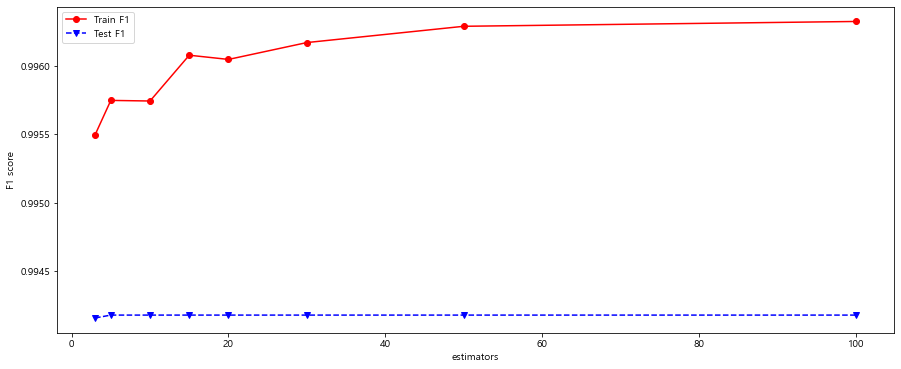

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 0
recall score 실제 충전소가 맞는 지 맞춘 경우 : 0 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47120 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 0 / 47120


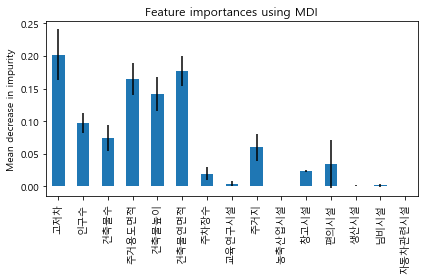

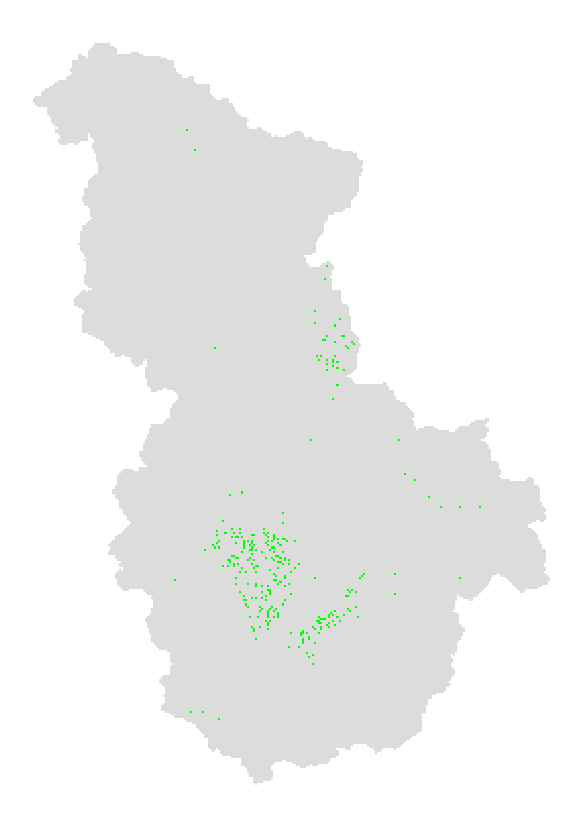

In [38]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,13,15], 
    'n_estimators' : [10,20,30,50,100,200]
}

clf, df = RandomForest(dists, train_data, train_target, test_data, test_target)

### 정규화 -> 언더샘플링

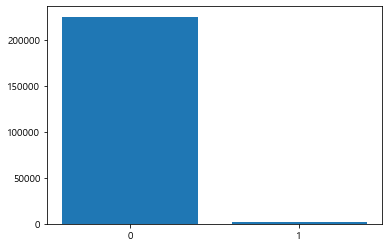

In [39]:
plt.bar([0, 1], train_target.value_counts())
plt.xticks([0, 1], label=[0,1])
plt.show()

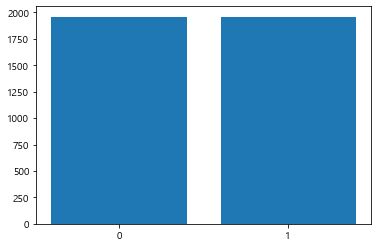

In [40]:
rus = RandomUnderSampler()
train_data, train_target = rus.fit_resample(train_data, train_target)

plt.bar([0, 1], train_target.value_counts())
plt.xticks([0, 1], label=[0,1])
plt.show()


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 3 max_depth= 10 max_features= 5
best_score (test F1 score): 0.9121866824204574



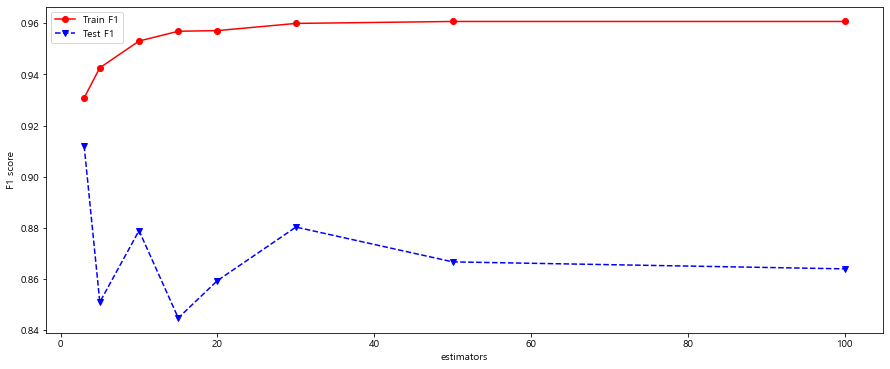

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 9524
recall score 실제 충전소가 맞는 지 맞춘 경우 : 178 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 37774 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 9346 / 47120


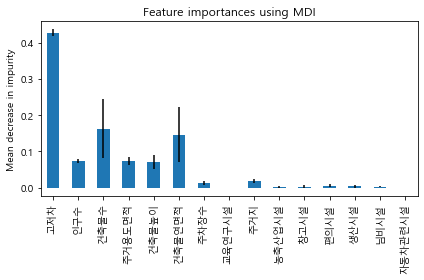

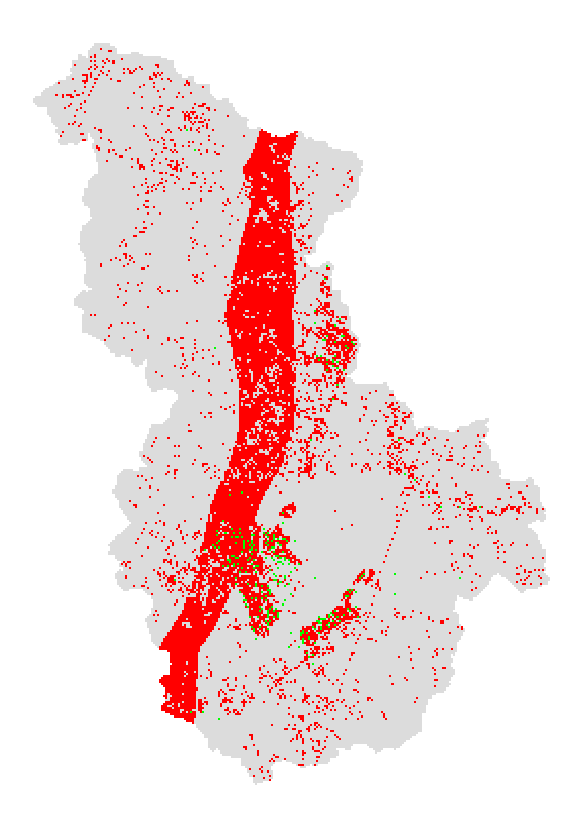

In [41]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,13,15], 
    'n_estimators' : [10,20,30,50,100,200]
}

clf, df = RandomForest(dists, train_data, train_target, test_data, test_target)

### 정규화 -> 오버샘플링

In [42]:
train_data = pd.concat([daegu[daegu.columns[3:-1]], daejeon[daejeon.columns[3:-1]]])
train_target = pd.concat([daegu[daegu.columns[-1]], daejeon[daejeon.columns[-1]]])

test_data = sejong[sejong.columns[3:-1]]
test_target = sejong[sejong.columns[-1]]

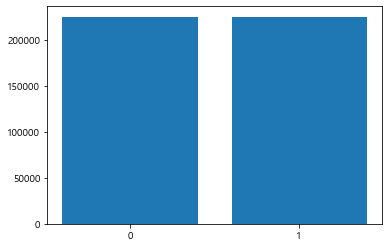

In [43]:
ros = RandomOverSampler()
train_data, train_target = ros.fit_resample(train_data, train_target)

plt.bar([0, 1], train_target.value_counts())
plt.xticks([0, 1], label=[0,1])
plt.show()


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 15 max_depth= 20 max_features= 7
best_score (test F1 score): 0.9608827749177146



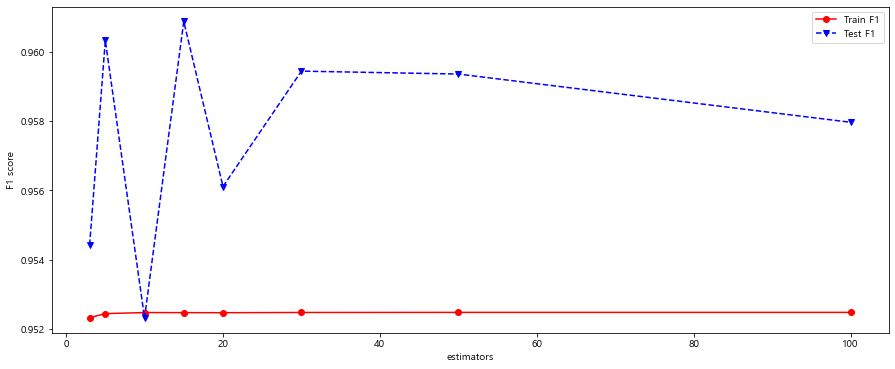

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 1753
recall score 실제 충전소가 맞는 지 맞춘 경우 : 13 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 45380 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 1740 / 47120


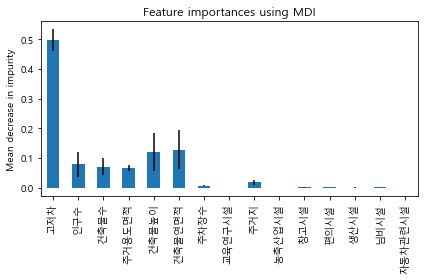

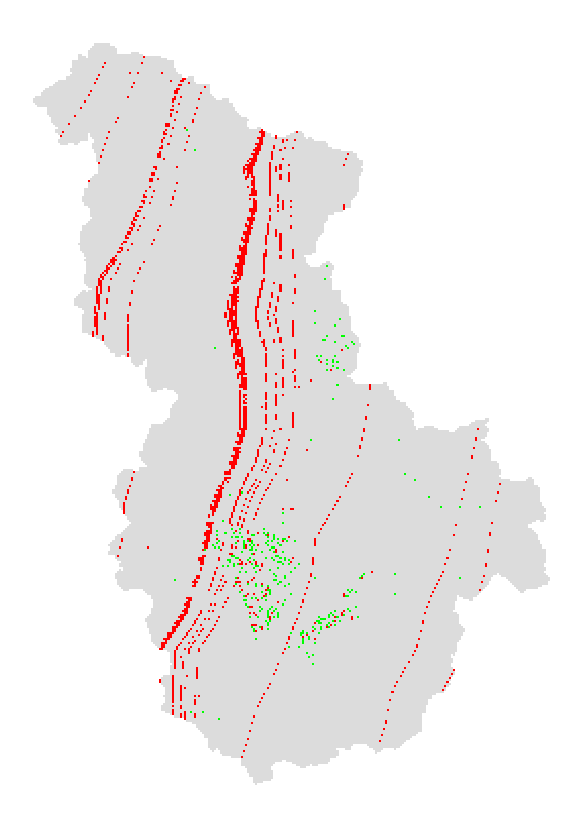

In [44]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,13,15], 
    'n_estimators' : [10,20,30,50,100]
}

clf, df = RandomForest(dists, train_data, train_target, test_data, test_target)

### 인구수=0 & 충전소=0 인 타일 제거

In [45]:
# 데이터 불러오기

sejong = geopandas.read_file('./dataset/전처리후/세종/merge_9.geojson', encoding='utf-8')
sejong = sejong[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

daegu = geopandas.read_file('./dataset/전처리후/대구/merge_9.geojson', encoding='utf-8')
daegu = daegu[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

daejeon = geopandas.read_file('./dataset/전처리후/대전/merge_9.geojson', encoding='utf-8')
daejeon = daejeon[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

In [46]:
# 인구수 = 0 & 충전소 = 0 인 타일 제거

sejong_pp = sejong.drop(sejong[(sejong['인구수']==0) & (sejong['EV']==0)].index)
daegu_pp = daegu.drop(daegu[(daegu['인구수']==0) & (daegu['EV']==0)].index)
daejeon_pp = daejeon.drop(daejeon[(daejeon['인구수']==0) & (daejeon['EV']==0)].index)

print('세종시 데이터 수 :', len(sejong))
print('세종시 인구수=0인 타일:', len(sejong_pp), end='\n\n')

print('대전시 데이터 수 :', len(daejeon))
print('대전시 인구수=0인 타일:', len(daejeon_pp), end='\n\n')

print('대구시 데이터 수 :', len(daegu))
print('대구시 인구수=0인 타일:', len(daegu_pp))

sejong_pp_idx = sejong_pp.index

sejong_pp.reset_index(drop=True, inplace=True)
daejeon_pp.reset_index(drop=True, inplace=True)
daegu_pp.reset_index(drop=True, inplace=True)

세종시 데이터 수 : 47396
세종시 인구수=0인 타일: 3391

대전시 데이터 수 : 92051
대전시 인구수=0인 타일: 12557

대구시 데이터 수 : 134846
대구시 인구수=0인 타일: 18830


In [47]:
# 정규화

scaler = MinMaxScaler()
sejong_pp_minmax = scaler.fit_transform(sejong_pp[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
sejong_pp_minmax = pd.DataFrame(sejong_pp_minmax, columns=['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
sejong_pp[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = sejong_pp_minmax

daegu_pp_minmax = scaler.fit_transform(daegu_pp[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
daegu_pp_minmax = pd.DataFrame(daegu_pp_minmax, columns=['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
daegu_pp[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = daegu_pp_minmax

daejeon_pp_minmax = scaler.fit_transform(daejeon_pp[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
daejeon_pp_minmax = pd.DataFrame(daejeon_pp_minmax, columns=['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
daejeon_pp[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = daejeon_pp_minmax

In [48]:
# 학습 / 검증 데이터 셋 분리

train_data = pd.concat([daegu_pp[daegu_pp.columns[3:-1]], daejeon_pp[daejeon_pp.columns[3:-1]]])
train_target = pd.concat([daegu_pp[daegu_pp.columns[-1]], daejeon_pp[daejeon_pp.columns[-1]]])

test_data = sejong_pp[sejong_pp.columns[3:-1]]
test_target = sejong_pp[sejong_pp.columns[-1]]

test_data.set_index(sejong_pp_idx, inplace=True)


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 3 max_depth= 10 max_features= 3
best_score (test F1 score): 0.9563550575051607



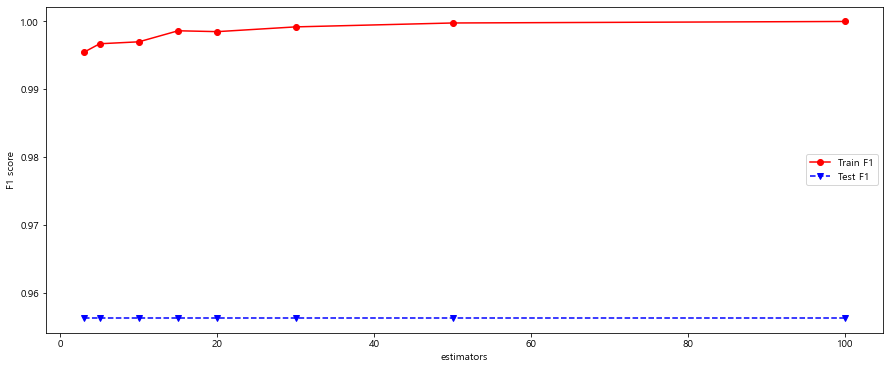

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 132
recall score 실제 충전소가 맞는 지 맞춘 경우 : 128 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47116 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 4 / 47120


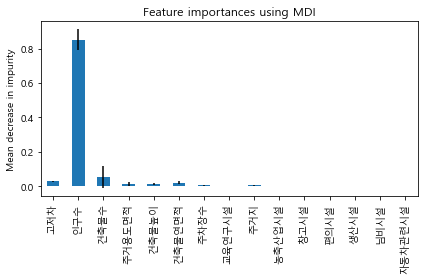

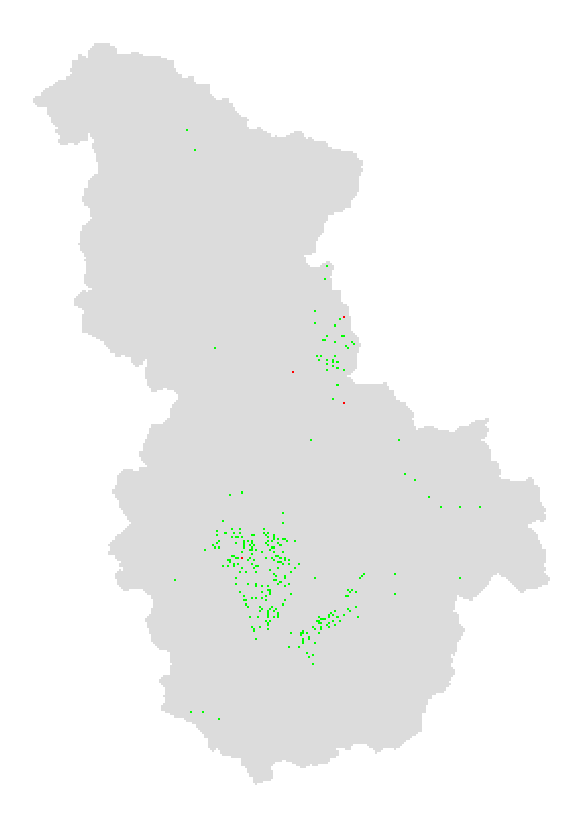

In [49]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,13,15], 
    'n_estimators' : [10,20,30,50,100,200]
}

clf, df = RandomForest(dists, train_data, train_target, test_data, test_target)

### 언더샘플링

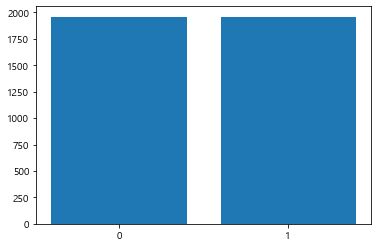

In [50]:
rus = RandomUnderSampler()
train_data_ruc, train_target_ruc = rus.fit_resample(train_data, train_target)

plt.bar([0, 1], train_target_ruc.value_counts())
plt.xticks([0, 1], label=[0,1])
plt.show()


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 3 max_depth= 10 max_features= 7
best_score (test F1 score): 0.9563550575051607



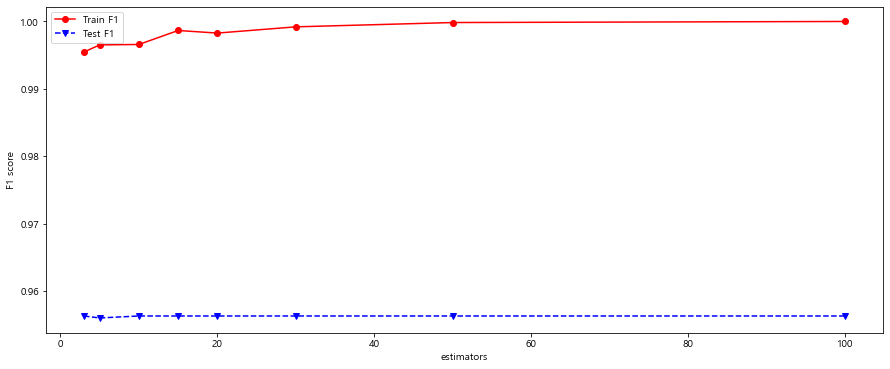

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 322
recall score 실제 충전소가 맞는 지 맞춘 경우 : 153 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 46951 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 169 / 47120


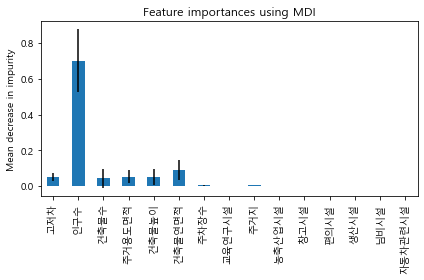

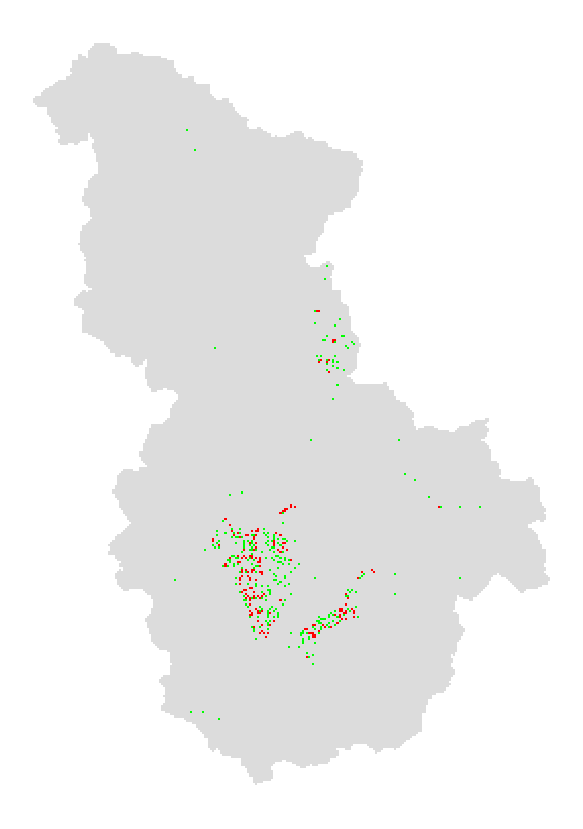

In [51]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,13,15], 
    'n_estimators' : [10,20,30,50,100,200]
}

clf, df = RandomForest(dists, train_data, train_target, test_data, test_target)

### 오버샘플링

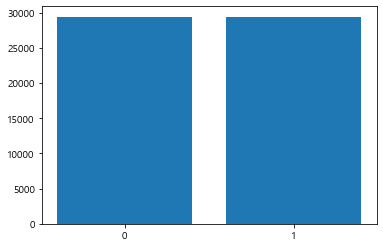

In [52]:
ros = RandomOverSampler()
train_data_roc, train_target_roc = ros.fit_resample(train_data, train_target)

plt.bar([0, 1], train_target_roc.value_counts())
plt.xticks([0, 1], label=[0,1])
plt.show()


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 3 max_depth= 10 max_features= 5
best_score (test F1 score): 0.956649955765261



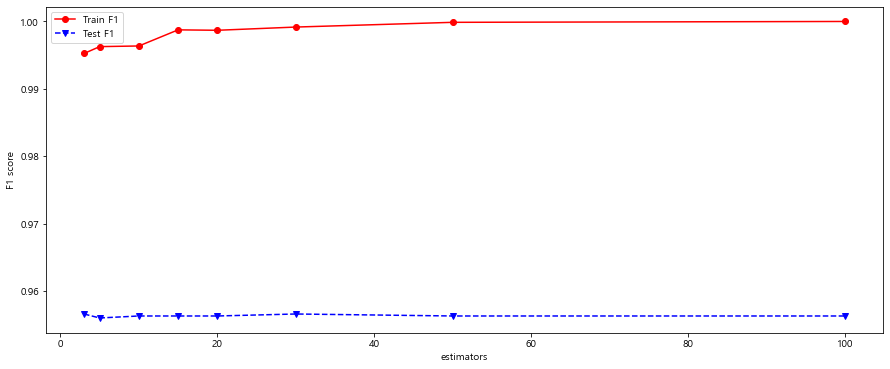

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 131
recall score 실제 충전소가 맞는 지 맞춘 경우 : 128 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47117 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 3 / 47120


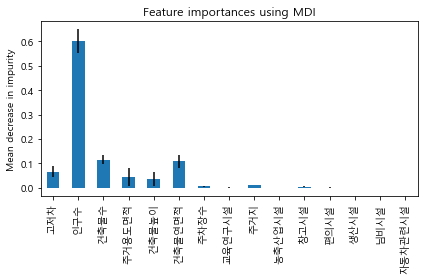

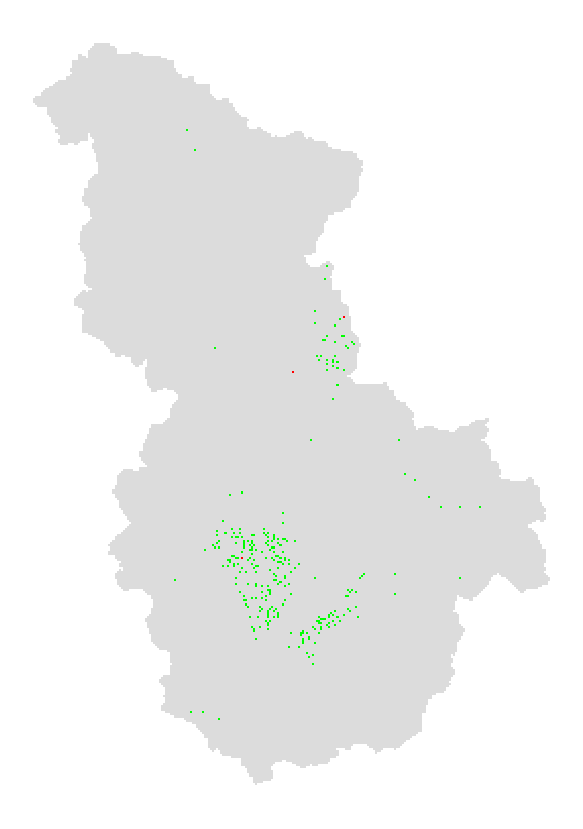

In [53]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,13,15], 
    'n_estimators' : [10,20,30,50,100]
}

clf, df = RandomForest(dists, train_data, train_target, test_data, test_target)

### 오버샘플링 (SMOTE)

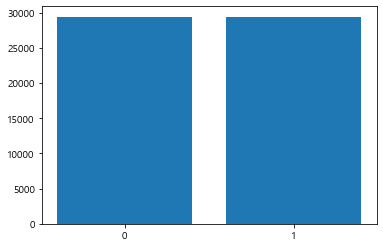

In [54]:
ros = SMOTE()
train_data_roc, train_target_roc = ros.fit_resample(train_data, train_target)

plt.bar([0, 1], train_target_roc.value_counts())
plt.xticks([0, 1], label=[0,1])
plt.show()


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 20 max_depth= 10 max_features= 15
best_score (test F1 score): 0.956649955765261



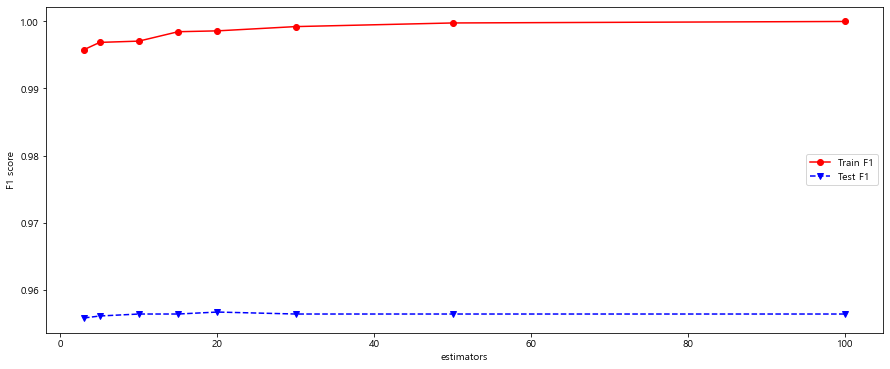

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 134
recall score 실제 충전소가 맞는 지 맞춘 경우 : 129 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47115 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 5 / 47120


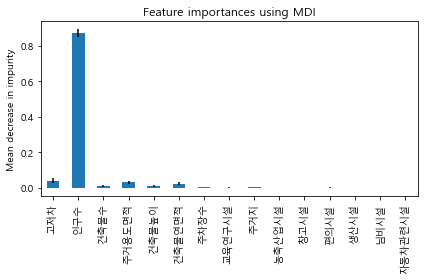

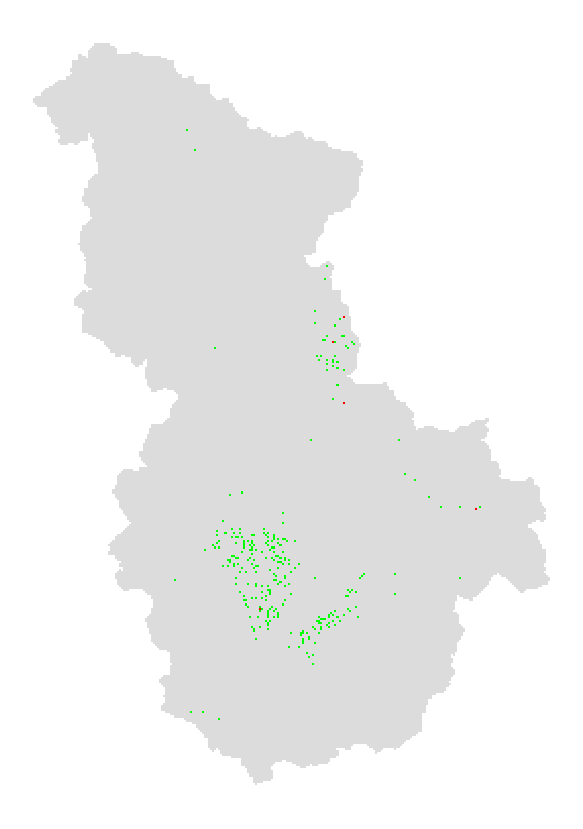

In [55]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,13,15], 
    'n_estimators' : [10,20,30,50,100,200]
}

clf, df = RandomForest(dists, train_data, train_target, test_data, test_target)

## class_weight 설정

In [57]:
def RandomForest(dists, train_data, train_target, test_data, test_target):
    
    trainF1 = []
    testF1 = []
    sketch_trainF1 = []
    sketch_testF1 = []
    param = []
    
    for estimators in dists['max_depth']:
        testf1indepth = []
        trainf1indepth = []
        for depth in dists['n_estimators']:
            for features in dists['max_features']:
                for cw in dists['class_weight']:
                    clf = ensemble.RandomForestClassifier(n_estimators=estimators, max_depth=depth, max_features=features, class_weight=cw, n_jobs=4)
                    clf.fit(train_data, train_target)
                    Y_predTrain = clf.predict(train_data)
                    Y_predTest = clf.predict(test_data)

                    param.append([estimators, depth, features, cw])
                    trainF1.append(f1_score(train_target, Y_predTrain, average='micro'))
                    testF1.append(f1_score(test_target, Y_predTest, average='micro'))
                    testf1indepth.append(f1_score(test_target, Y_predTest, average='micro'))
                    trainf1indepth.append(f1_score(train_target, Y_predTrain, average='micro'))
        
        sketch_trainF1.append(max(trainf1indepth))
        sketch_testF1.append(max(testf1indepth))
                    
    best_params = param[testF1.index(max(testF1))]
    print()
    print('best_params (test 성능이 가장 좋은 파라미터) : ', 'n_estimators=', best_params[0], 'max_depth=', best_params[1], 'max_features=', best_params[2], 'class_weight=', best_params[3])
    print('best_score (test F1 score):', max(testF1))
    print()

    # F1 score 비교
    plt.figure(figsize=(15, 6))
    plt.plot(dists['max_depth'], sketch_trainF1, 'ro-', dists['max_depth'], sketch_testF1, 'bv--')
    plt.legend(['Train F1', 'Test F1'])
    plt.xlabel('estimators')
    plt.ylabel('F1 score')
    plt.show()
    
    # 최적의 파라미터를 입력해 모델을 생성
    clf = ensemble.RandomForestClassifier(n_estimators=best_params[0], max_depth=best_params[1], max_features=best_params[2], class_weight=best_params[3], n_jobs=4)
    clf.fit(train_data, train_target)
    Y_predTest = clf.predict(test_data)
    
    # 지도 그리기
    temp = sejong.copy()
    temp['pred'] = [0]*len(temp)
    for i, idx in enumerate(test_data.index):
        temp['pred'][idx] = Y_predTest[i]
    #temp['pred'] = pred
        
    print('실제 충전소 수 :', len(temp[temp['EV']==1]))
    print('충전소가 있어야 한다고 분류한 타일 수 :', len(temp[temp['pred']==1]))
    print('recall score 실제 충전소가 맞는 지 맞춘 경우 :', len(temp[(temp['pred']==1) & (temp['EV']==1)]), '/', len(temp[temp['EV']==1]))
    print('precision score 실제 충전소가 없는 곳을 맞춘 경우 :', len(temp[(temp['pred']==0) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    print('최적 입지 후보(실제론 없지만, 있어야 한다고 분류) :', len(temp[(temp['pred']==1) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    
    # feature inportance
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
    clf_importances = pd.Series(importances, index=test_data.columns)

    fig, ax = plt.subplots()
    clf_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    
    idx = temp[(temp['EV'] == 0) & (temp['pred'] == 1)].index
    for i in temp[temp['pred'] == 1].index:
        temp['pred'].loc[i] = 0
    for i in idx:
        temp['pred'].loc[i] = 1

    fig, ax1 = plt.subplots(figsize=(15, 15))
    fig.set_facecolor('white')
    sejong['geometry'].plot(ax=ax1, color='gainsboro')
    sejong[sejong['EV']==1].plot(ax=ax1, column='EV', color='lime', aspect=1)
    temp[temp['pred']==1].plot(ax=ax1, column='pred', color='red', aspect=1)
    ax1.set_axis_off()
    plt.show()
    
    return clf, temp


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 15 max_depth= 10 max_features= 15 class_weight= {0: 3, 1: 7}
best_score (test F1 score): 0.956649955765261



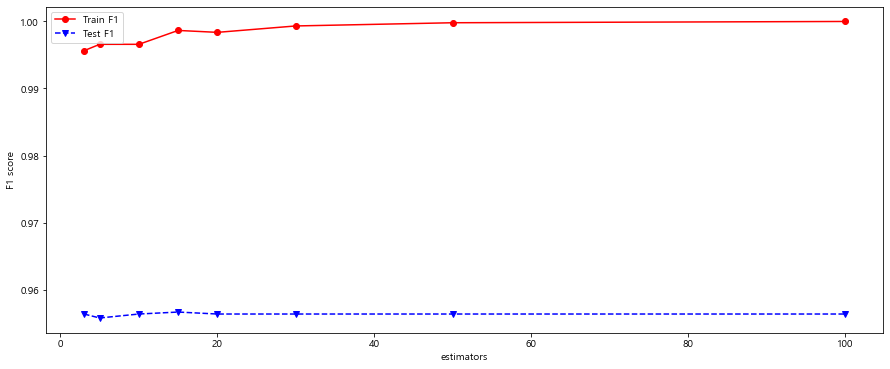

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 136
recall score 실제 충전소가 맞는 지 맞춘 경우 : 131 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47115 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 5 / 47120


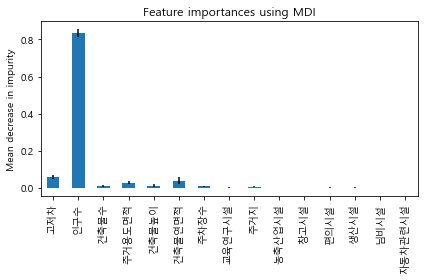

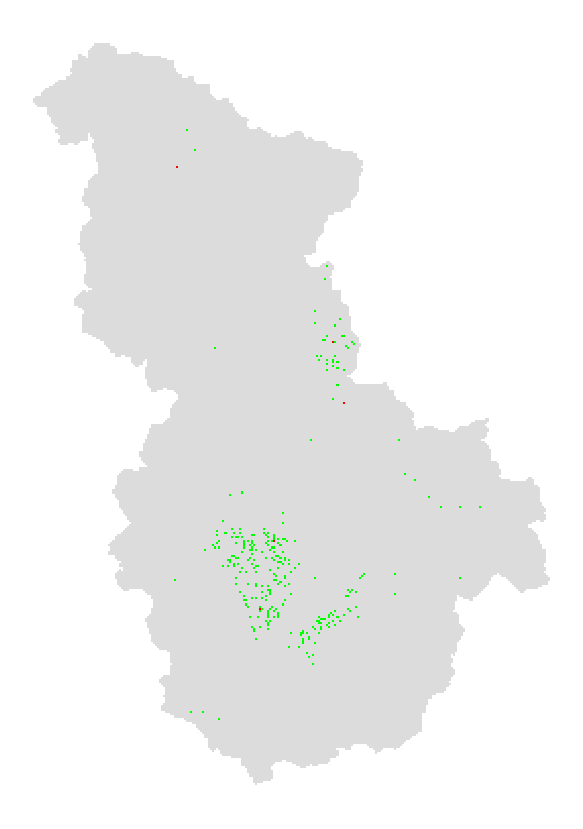

In [58]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,13,15], 
    'n_estimators' : [10,20,30,50,100,200],
    'class_weight' : [{0:3, 1:7}]
}

clf, df = RandomForest(dists, train_data, train_target, test_data, test_target)

In [56]:
### 가중치도 넣어서 해보자
### 다른 모델도 써보자
### 데이터도 늘려보자

In [58]:
df[(df['pred']==1) & (df['EV']==0)]

,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV,pred
55,"POLYGON ((980100.00000 1829500.00000, 980100.0...",36.463804,127.276783,24.915,334,2,0.00,26.23,8475.39,0,0,0,0,0,0,0,0,0,0,1
269,"POLYGON ((984500.00000 1840000.00000, 984500.0...",36.558132,127.325567,24.937,9,7,70.07,5.00,90.88,1,0,0,0,0,0,0,0,0,0,1
328,"POLYGON ((980900.00000 1830900.00000, 980900.0...",36.476381,127.285652,24.920,246,2,0.00,42.85,4899.98,0,0,0,0,0,0,0,0,0,0,1
434,"POLYGON ((976800.00000 1834000.00000, 976800.0...",36.504231,127.240195,24.801,166,1,0.00,34.80,6652.28,0,0,0,0,0,0,0,0,0,0,1
529,"POLYGON ((975600.00000 1835000.00000, 975600.0...",36.513214,127.226890,24.769,177,1,0.00,43.75,7208.54,0,0,0,0,0,0,0,0,0,0,1
652,"POLYGON ((971800.00000 1853700.00000, 971800.0...",36.681208,127.184758,24.587,36,1,0.00,15.50,1800.15,0,0,0,0,0,0,0,0,0,0,1
998,"POLYGON ((981300.00000 1830800.00000, 981300.0...",36.475483,127.290087,24.932,288,2,0.00,35.70,5669.32,0,0,0,0,0,0,0,0,0,0,1
1081,"POLYGON ((982300.00000 1831400.00000, 982300.0...",36.480873,127.301175,24.952,209,1,0.00,51.86,7872.93,0,0,0,0,0,0,0,0,0,0,1
1397,"POLYGON ((977100.00000 1834000.00000, 977100.0...",36.504231,127.243521,24.807,159,1,0.00,34.80,6652.28,0,0,0,0,0,0,0,0,0,0,1
2062,"POLYGON ((976600.00000 1834000.00000, 976600.0...",36.504231,127.237977,24.796,130,1,0.00,76.90,6462.33,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
예림님이 estimators 옵션만 건드려서 성능이 좋앗던데 그렇게도 해보자
0 삭제 -> 정규화 -> class_weight
정규화 -> 0 삭제 -> class_weight
auroc, clustering

In [ ]:
xgb, light gbm, catboost, auroc